Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Kayla Kim 
Collaborators: Natalia Forero, Ananya Gandhi 

In [3]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 5:  Numerical Differentiation and Quadrature

## Question 1 - Fundamental Theorem of Calculus

**(a)** [10] Write a function that computes the integral of the derivative 

$$I[f] = \int^x_0 f'(s) ds$$

and returns the error from the expected calculation.  Use a second order accurate centered difference scheme and then a left-hand rule to compute the absolute error.  In this case the left-hand quadrature is

$$Q[f] = f(x_i) \Delta x$$

The function should take in $x$ values and the function $f(x)$ and return a vector of the **errors** for each value $x$ given.

In [6]:
def int_diff_error(x, f):
    # YOUR CODE HERE
    deltax = x[1] - x[0] 
    fprime = numpy.empty(x.shape)
    fprime[1: -1] = ( f(x[2:]) - f(x[:-2]) ) / (2 * deltax)
    fprime[0] = (f(x[1]) - f(x[0]) ) / deltax
    fprime[-1] = (f(x[-1]) - f(x[-2]) ) / deltax
    Qf = numpy.zeros(x.shape)
    Qf[0] = fprime[0] * deltax
    for i in range(1, numpy.size(x)):
        Qf[i] = Qf[i-1] + fprime[i] * deltax
    error = abs(Qf - (f(x) - 1.))
    return error

In [7]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(int_diff_error(x, f)))
numpy.testing.assert_allclose(int_diff_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

0.006707859736810928
Successful FTC evaluation.


**(b)** [10] Compute the same as above except reverse the order of the operations, i.e.

$$D[f] = \frac{\text{d}}{\text{d}x} \int^x_0 f(s) ds$$


In [10]:
def diff_int_error(x, f):
    # YOUR CODE HERE
    Qf = numpy.zeros(x.shape)
    deltax = x[1] - x[0]
    Qf[0] = f(x[0]) * deltax 
    for i in range(1, numpy.size(x)):
        Qf[i] = Qf[i-1] + f(x[i]) * deltax 
    fprime = numpy.empty(x.shape) 
    fprime[1:-1] = (Qf[2:] - Qf[:-2]) / (2 * deltax)
    fprime[0] = (Qf[1] - Qf[0]) / deltax
    fprime[-1] = (Qf[-1] - Qf[-2])/ deltax 
    error = abs(fprime-f(x))
    return error

In [11]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(diff_int_error(x, f)))
numpy.testing.assert_allclose(diff_int_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

0.006507137941233254
Successful FTC evaluation.


**(c)** [5] Plot the convergence rate for the number of partitions `N = [10,100,200,300,400,500]` on a `loglog` plot by computing the norm over the error given for each $N$ by using the `numpy.linalg.norm` command with `ord=numpy.infty` vs. the $\Delta x$ used.  Theorize about what you observe regarding the order of convergence.

YOUR ANSWER HERE

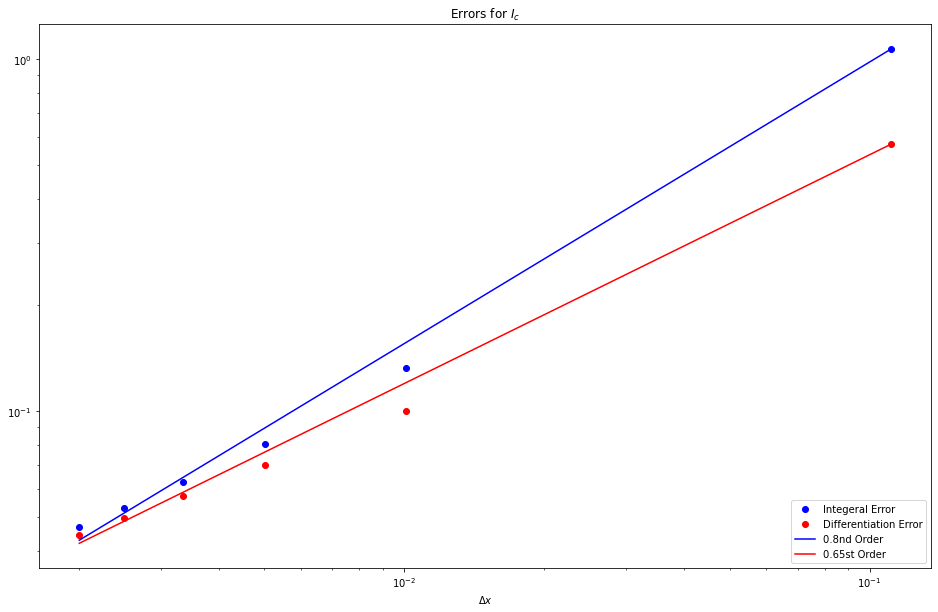

In [17]:
# YOUR CODE HERE
N = [10,100,200,300,400,500]
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
differror = []
interror = []
deltax = []

for i in range(numpy.size(N)):
    x = numpy.linspace(0., 1., N[i])
    deltax.append(x[1] - x[0])
    differror.append(numpy.linalg.norm(numpy.abs(diff_int_error(x, f)), ord=2))
    interror.append(numpy.linalg.norm(numpy.abs(int_diff_error(x, f)), ord=2))

differror = numpy.array(differror)
interror = numpy.array(interror)

fig = plt.figure(figsize = (16,10))
plt.loglog(deltax,interror,"bo",label="Integeral Error")
plt.loglog(deltax,differror,"ro",label="Differentiation Error")
orderC = lambda deltax, differror, order: numpy.exp(numpy.log(differror) - order * numpy.log(deltax))
plt.loglog(deltax, orderC(deltax[0], interror[0], 0.8) * numpy.power(deltax,0.8), 'b', label="0.8nd Order")
plt.loglog(deltax, orderC(deltax[0], differror[0], 0.65) * numpy.power(deltax,0.65), 'r', label="0.65st Order")
plt.xlabel("$\Delta x$")
plt.title("Errors for $I_c$")
plt.legend(loc=4)

## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** [2] Where do you imagine the problematic points of the integrals will be?

YOUR ANSWER HERE

The problematic points would be when the integrals approach infinity, which is 0. Therefore the problematic points for both integrals would be 0. 

**(b)** [10] Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [29]:
def trap_1(N):
    # YOUR CODE HERE 
    x = numpy.linspace(0., 1., N+1)
    deltax = x[1] - x[0] 
    
    fs = lambda x: numpy.sin(x) / numpy.sqrt(x)
    fc = lambda x: numpy.cos(x) / numpy.sqrt(x) 
    
    Qs = numpy.zeros(N)
    Qs[0] = fs(x[1]) * deltax / 2.
    for i in range(1, N):
        Qs[i] = Qs[i-1] + (fs(x[i+1]) + fs(x[i])) * deltax /2.
    
    Qc = numpy.zeros(N) 
    Qc[0] = fc(x[1]) * deltax / 2.
    for i in range(1, N):
        Qc[i] = Qc[i-1] + (fc(x[i+1]) + fc(x[i])) * deltax /2. 
    
    Is = Qs[N-1]
    Ic = Qc[N-1]
    
    return Is, Ic

In [30]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal rule only.")

Error: 7.324979502931761e-05
Computed the integrals correctly using the trapezoidal rule only.


**(c)** [10] A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function.  This can be useful in situations such as the one we have found ourselves in.  Consider the integral
$$
    \int^{x_{i+1}}_{x_i} \frac{f(x)}{\sqrt{x}} dx
$$
where here the weighting function is $x^{-1/2}$.  Say we wanted to approximate this integral by approximating $f(x)$ as a linear polynomial interpolant.  Find the resulting quadrature rule for approximating the weighted integral.

YOUR ANSWER HERE

Reference: 08_quadrature notes 

The coefficients of the polynomial in each interval are 
$$p_0 = f(x_i) \quad \quad p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

which gives the interpolating polynomial

$$p_1(x) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} ( x- x_i) + f(x_i)$$


Integrating this polynomial we have

$$I_N[f] = \int^{x_{i+1}}_{x_i} x^{-1/2}(p_0 + p_1 (x - x_i)) dx \\
= 2 p_0 x^{1/2} + \dfrac{2}{3}p_1 x^{3/2} - 2p_1x_ix^{1/2} dx |^{x_{i+1}}_{x_i} $$

plugging in $p_o = f(x_i), p_i = \dfrac{f(x_{i+1} - f(x_i)}{x_{i+1}-x_{i}}, and solving, we find that we get 

$$
    \int^{x_{i+1}}_{x_i} \frac{f(x)}{\sqrt{x}} dx \approx \dfrac{2}{3}(2f(x_i) + f(x_{i+1}))
$$

**(d)** Use part (c) and evaluate only the first partition $[0, \Delta x]$ using that quadrature and use trapezoid rule for the rest of the partitions.

In [31]:
def trap_wnc(N):
    # YOUR CODE HERE
    x = numpy.linspace(0., 1., N+1)
    deltax = x[1] - x[0] 
    
    fs = lambda x: numpy.sin(x) / numpy.sqrt(x) 
    fc = lambda x: numpy.cos(x) / numpy.sqrt(x) 
    
    Qs = numpy.zeros(N)
    Qs[0] = fs(x[1]) * deltax * 2 / 3
    for i in range(1, N):
        Qs[i] = Qs[i-1] + (fs(x[i+1]) + fs(x[i])) * deltax / 2.
        
    Qc = numpy.zeros(N) 
    Qc[0] = fc(x[1]) * deltax * 2 / 3
    for i in range(1, N):
        Qc[i] = Qc[i-1] + (fc(x[i+1]) + fc(x[i])) * deltax / 2. 
    
    Is = Qs[N-1]
    Ic = Qc[N-1]
    
    return Is, Ic

In [32]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 1.4324475453353358e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** [5] Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

In [35]:
def trap_transformed(N):
    # YOUR CODE HERE
    t = numpy.linspace(0., 1., N+1)
    deltax = t[1] - t[0] 
        
    fs = lambda t: 2 * numpy.sin(t*t)
    fc = lambda t: 2 * numpy.cos(t*t)
    
    Qs = numpy.zeros(N)
    Qs[0] = (fs(t[1]) + fs(t[0])) * deltax / 2.
    for i in range(1, N):
        Qs[i] = Qs[i-1] + (fs(t[i+1]) + fs(t[i])) * deltax / 2.
    
    Qc = numpy.zeros(N)
    Qc[0] = (fc(t[1]) + fc(t[0])) * deltax / 2.
    for i in range(1, N):
        Qc[i] = Qc[i-1] + (fc(t[i+1]) + fc(t[i])) * deltax / 2.
    
    Is = Qs[N-1]
    Ic = Qc[N-1]
    
    return Is, Ic

In [36]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print("Computed the integrals correctly using the trapezoidal rule.")

Error: 4.502544250550855e-06
Computed the integrals correctly using the trapezoidal rule.


**(f)** [5] Do the same as in part (e) again using the transformation $x=t^2$ but use 3-point Gauss-Legendre quadrature for the approximation to the integral.

In [50]:
def gauss_legendre_3(N):
    # YOUR CODE HERE
    
    x = numpy.linspace(0., 1., N+1)
    deltax = x[1] - x[0] 
        
    fs = lambda x: 2 * numpy.sin(x*x)
    fc = lambda x: 2 * numpy.cos(x*x)
    
    ximap = lambda a, b, xi: (b - a) / 2. * xi + (a + b) / 2.
    xi = [-numpy.sqrt(3 / 5), 0, numpy.sqrt(3 / 5)]
    w = [5 / 9, 8 / 9, 5 / 9]
    
    Qs = 0
    for i in range(0, N):
        for k in range(len(xi)):
            Qs += fs(ximap(x[i], x[i+1], xi[k])) * w[k]
    Qs *= deltax / 2
    
    Qc = 0
    for i in range(0, N):
        for k in range(len(xi)):
            Qc += fc(ximap(x[i], x[i+1], xi[k])) * w[k]
    Qc *= deltax / 2
    
    Is = Qs
    Ic = Qc
    
    return Is, Ic

In [51]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 8.57062198988956e-11
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(g)** [5] Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

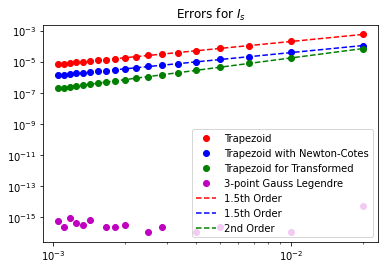

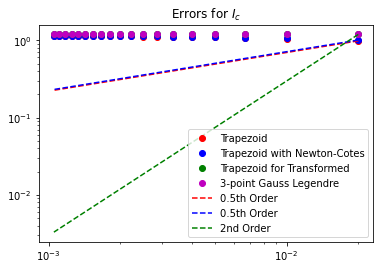

In [92]:
# YOUR CODE HERE
import scipy.special

# Methods: trap, trap newton-cotes, trap transformed, 3 point gauss-legendre 

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))

error_trap_1_s = numpy.empty(len(num_partitions))
error_trap_1_c = numpy.empty(len(num_partitions))

error_trap_wnc_s = numpy.empty(len(num_partitions))
error_trap_wnc_c = numpy.empty(len(num_partitions))

error_trap_transformed_s = numpy.empty(len(num_partitions))
error_trap_transformed_c = numpy.empty(len(num_partitions))

error_gauss_legendre_3_s = numpy.empty(len(num_partitions))
error_gauss_legendre_3_c = numpy.empty(len(num_partitions))

Is, Ic = scipy.special.fresnel(numpy.sqrt(2 / numpy.pi))
Is *= numpy.sqrt(2 * numpy.pi)
Ic *= numpy.sqrt(2 * numpy.pi) 

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # Compute trapezoidal 
    error_trap_1_s[j], error_trap_1_c[j] = trap_1(num_partitions[j])
    error_trap_1_s[j] = abs(error_trap_1_s[j] - Is)
    error_trap_1_c[j] = abs(error_trap_1_c[j] - Is)
    
    # Compute trapezoidal with newton cotes
    error_trap_wnc_s[j], error_trap_wnc_c[j] = trap_wnc(num_partitions[j])
    error_trap_wnc_s[j] = abs(error_trap_wnc_s[j] - Is)
    error_trap_wnc_c[j] = abs(error_trap_wnc_c[j] - Is)

    # Compute trapezoidal for transformed 
    error_trap_transformed_s[j], error_trap_transformed_c[j] = trap_transformed(num_partitions[j])
    error_trap_transformed_s[j] = abs(error_trap_transformed_s[j] - Is)
    error_trap_transformed_c[j] = abs(error_trap_transformed_c[j] - Is)
    
    # Compute Gauss-Legendre Quadrature 3-point 
    error_gauss_legendre_3_s[j], error_gauss_legendre_3_c[j] = gauss_legendre_3(num_partitions[j])
    error_gauss_legendre_3_s[j] = abs(error_gauss_legendre_3_s[j] - Is)
    error_gauss_legendre_3_c[j] = abs(error_gauss_legendre_3_c[j] - Is)
    
#PLOTS

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))

# for Is:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
plt.title("Errors for $I_s$")

axes.loglog(delta_x, error_trap_1_s, 'ro', label="Trapezoid")
axes.loglog(delta_x, error_trap_wnc_s, 'bo', label="Trapezoid with Newton-Cotes")
axes.loglog(delta_x, error_trap_transformed_s, 'go', label="Trapezoid for Transformed")
axes.loglog(delta_x, error_gauss_legendre_3_s, 'mo', label="3-point Gauss Legendre")

axes.loglog(delta_x, order_C(delta_x[0], error_trap_1_s[0], 1.5) * delta_x**1.5, 'r--', label="1.5th Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_wnc_s[0], 1.5) * delta_x**1.5, 'b--', label="1.5th Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_transformed_s[0], 2.0) * delta_x**2.0, 'g--', label="2nd Order")

axes.legend(loc=4)

# for Ic:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
plt.title("Errors for $I_c$")

axes.loglog(delta_x, error_trap_1_c, 'ro', label="Trapezoid")
axes.loglog(delta_x, error_trap_wnc_c, 'bo', label="Trapezoid with Newton-Cotes")
axes.loglog(delta_x, error_trap_transformed_c, 'go', label="Trapezoid for Transformed")
axes.loglog(delta_x, error_gauss_legendre_3_c, 'mo', label="3-point Gauss Legendre")

axes.loglog(delta_x, order_C(delta_x[0], error_trap_1_c[0], 0.5) * delta_x**0.5, 'r--', label="0.5th Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_wnc_c[0], 0.5) * delta_x**0.5, 'b--', label="0.5th Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_transformed_c[0], 2.0) * delta_x**2.0, 'g--', label="2nd Order")

axes.legend(loc=4)

plt.show()

**(h)** [3] Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

YOUR ANSWER HERE

The order of accuracy from least to most accurate is the Trapezoidal method (trap_1), Trapezoidal with Newton-Cotes (trap_wnc), transformed Trapezoidal (trap_transformed), and finally the 3-point Gauss-Legendre quadrature (gauss_legendre_3). 

These vast differences in convergence rates is because of the order of convergence for each: the trap rule and trap_wnc are 1st order, while the transformed is 2nd order. The gauss-legendre quadrature does not have a convergence line, and has very small error in the beginning. 

$I_c$ is less accurate than $I_s$, because when x approaches 0, the value for $I_c$ is much bigger than $I_s$. (i.e. the limit is greater)

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.  For the following assume that the data considered are equi-spaced points $(x_i, y_i)$, i.e. $\Delta x$ is uniform.

**(a)** [10] Derive the forward and backward second order finite difference approximations to the second derivative using the method of your choice.

YOUR ANSWER HERE

Reference: https://ocw.snu.ac.kr/sites/default/files/NOTE/Lecture%2008_0.pdf
https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

Forward second order finite difference approximation:

Take the taylor polynomial for $f(x_{i+1}), f(x_{i+2})$ for $x_i, x_{i+1}, x_{i+2}$ with uniform space, and $h = x_{i+2} - x_{i+1} = x_{i+1} - x_i$:

$$
    f(x_{i+1}) = f(x_i) + f'(x_i)h + \dfrac{f''(x_i)}{2!}h^2 + \dfrac{f'''(\mathscr{E}_1)}{3!}h^3 \\
    f(x_{i+2}) = f(x_i) + f'(x_i)2h + \dfrac{f''(x_i)}{2!}(2h)^2 + \dfrac{f'''(\mathscr{E}_2)}{3!}(2h)^3
$$

where $x_i ≤ \mathscr{E}_1 ≤ x_{i+1}$ and $x_{i-1} ≤ \mathscr{E}_2 ≤ x_i$. Using these equations, we can find the three-point forward difference formula for the second derivative for the truncation error $\mathcal{O}(h)$ by combining $f(x_{i+1})$ and $f(x_{i+2})$:
$$    
    f''(x_i) = \dfrac{f(x_i) - 2f(x_{i+1}) + f(x_{i+2})}{h^2}
$$

Similarly for the backward second order finite difference approximation, we take:
$$
    f(x_{i-1}) = f(x_i) - f'(x_i)h + \dfrac{f''(x_i)}{2!}h^2 - \dfrac{f'''(\mathscr{E}_1)}{3!}h^3 \\
    f(x_{i-2}) = f(x_i) - f'(x_i)2h + \dfrac{f''(x_i)}{2!}(2h)^2 - \dfrac{f'''(\mathscr{E}_2)}{3!}(2h)^3
$$
From this, we can find that the backward second order finite difference approximation for truncation error $\mathcal{O}(h)$ is
$$
    f''(x_i) = \dfrac{f(x_{i-2}) - 2f(x_{i-1}) + f(x_i)}{h^2}
$$

**(b)** [10] Using a second order centered finite difference approximation to the second derivative and the appropriate second order forward and backward difference schemes at the edges of the domain find the matrix $D$ such that multiplying a vector of $y$ values would lead to a second order approximation of the derivative for the given data.  In other words for $y_i = f(x_i)$
$$
    f''(x) \approx D y.
$$

YOUR ANSWER HERE

By adding the equations for the taylor series for $f(x_{i+1}), f(x_{i-1})$ from part 3.a, we can define the second order center finite difference approximation for the second derivative: 

\begin{equation}
\begin{split}
    f(x_{i+1}) &= f(x_i) + f'(x_i)h + \dfrac{f''(x_i)}{2!}h^2 + \dfrac{f'''(\mathscr{E}_1)}{3!}h^3 \\
    f(x_{i-1}) &= f(x_i) - f'(x_i)h + \dfrac{f''(x_i)}{2!}h^2 - \dfrac{f'''(\mathscr{E}_1)}{3!}h^3 \\
    f(x_{i+1}) + f(x_{i-1}) &= 2f(x_i) + f''(x_i)h^2 + \mathcal{O}(h^4) \\ 
    f''(x) &= \dfrac{f(x_{i-1}) - 2f(x_i)+ f(x_{i+1})}{h^2} + \mathcal{O}(h^2)
\end{split}
\end{equation}

for truncation error $\mathcal{O}(h^2)$

Using this second order forward and backward difference scheme at the edges of the domain, we can find matrix $D$ such that multiplying a vector of $y$ values would lead to a second order approximation of the derivative, by obtaining all the coefficients on the calls to $f$: 

$$
    D = \dfrac{1}{h^2} 
    \begin{bmatrix}
    1 & -2 & 1 & 0 & 0 & 0 & ... & 0 \\
    0 & 1 & -2 & 1 & 0 & 0 & ... & 0 \\
    0 & 0 & 1 & -2 & 1 & 0 & ... & 0 \\
    ... & ... & ... & ... &... & ... & ... & ... \\
    0 & 0 & 0 & 0 & 0 &1 & -2 & 1 \\
    \end{bmatrix}
$$

**(c)** [10] Write a function that takes in the number of data points $N$ and returns the matrix $D$.  Here assume we are on the interval $[-1, 1]$.  Note that inside your function 
$$
    \Delta x = \frac{2}{N - 1}
$$
to match the `linspace` command.

Beyond being convenient (once you construct the matrix you can apply it to any set of data) this operation is much faster than using loops.  *Hint:* The command `numpy.diag` may be extremely helpful.

In [86]:
def diff_matrix(N):
    # YOUR CODE HERE
    deltax = 2 / (N - 1)
    
    D = numpy.zeros((N, N))
    D += numpy.diag(-2 * numpy.ones(N), 0) + numpy.diag(numpy.ones(N - 1), 1) + numpy.diag(numpy.ones(N - 1), -1)
    D[0,:4] = [2, -5, 4, -1] 
    D[-1,-4:] = [-1, 4, -5, 2]

    D *= 1 / (deltax**2)    
    return D

In [87]:
N = 200
x = numpy.linspace(-1, 1, N)
y = numpy.sin(x) * numpy.cos(x)
numpy.testing.assert_allclose(numpy.dot(diff_matrix(N), y), -4.0 * numpy.sin(x) * numpy.cos(x), rtol=1e-2)
print("Success!")

Success!


**(c)** [5] Suppose instead that we did not know the vector $f(x_i) = y_i$ but instead knew the value of second derivative at these points.  If we wanted to find the vector $y$ what kind of problem would we have to solve?  What is the continuous analog of this problem and what additional information would we need?

YOUR ANSWER HERE

We would just need to solve backwards, using the matrix to solve for the vector $y$. This would be based on the assumption that we know the matrix $D$ and that it is invertible, which 